In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# LOAD EMBEDDINGS
a = np.load("C:/Users/Mitch/git/UWACapstoneG2/contributions/andre_italiano_22506333/bert model development/document_embeddings.npz")
loaded_array_list = [a[f] for f in a.files]

In [56]:
# PRINCIPAL COMPONENT ANALYSIS
#scaler = StandardScaler()
#scaled = scaler.fit_transform(loaded_array_list)
#pca = PCA(n_components=2)
#scaled_pca = pca.fit_transform(scaled)

In [57]:
# GRID SEARCH
param_grid = {'n_clusters': [10, 12, 14, 16, 18, 20], 'linkage': ['complete', 'average', 'single']}

def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    score = silhouette_score(X, labels)
    return score

clustering = AgglomerativeClustering()
grid_search = GridSearchCV(clustering, param_grid=param_grid, scoring=silhouette_scorer, cv=5, verbose=1)
grid_search.fit(loaded_array_list)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'linkage': 'average', 'n_clusters': 10}


In [58]:
results = grid_search.cv_results_
mean_silhouette_scores = results['mean_test_score']
params_used = results['params']

for score, params in zip(mean_silhouette_scores, params_used):
    print("Silhouette Score:", score)
    print("Parameters:", params)
    print("<---------------------------------------------------->")

Silhouette Score: 0.1453773483633995
Parameters: {'linkage': 'complete', 'n_clusters': 10}
<---------------------------------------------------->
Silhouette Score: 0.12936215698719025
Parameters: {'linkage': 'complete', 'n_clusters': 12}
<---------------------------------------------------->
Silhouette Score: 0.11637718677520752
Parameters: {'linkage': 'complete', 'n_clusters': 14}
<---------------------------------------------------->
Silhouette Score: 0.11931603401899338
Parameters: {'linkage': 'complete', 'n_clusters': 16}
<---------------------------------------------------->
Silhouette Score: 0.11721078157424927
Parameters: {'linkage': 'complete', 'n_clusters': 18}
<---------------------------------------------------->
Silhouette Score: 0.1117839902639389
Parameters: {'linkage': 'complete', 'n_clusters': 20}
<---------------------------------------------------->
Silhouette Score: 0.196670201420784
Parameters: {'linkage': 'average', 'n_clusters': 10}
<------------------------------

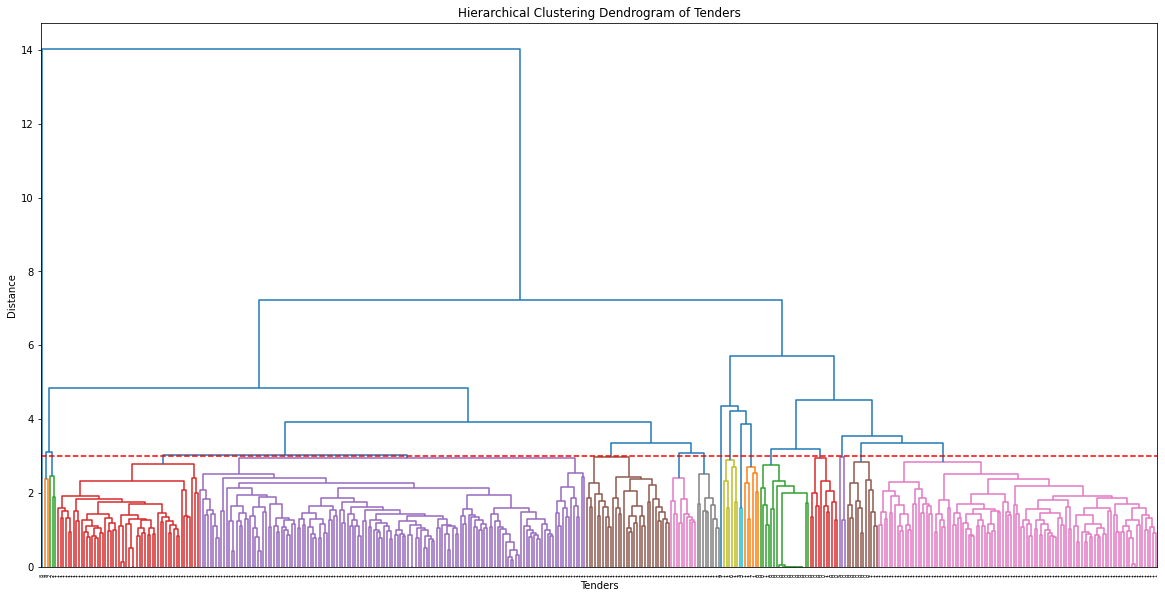

In [63]:
# AGGLOMERATIVE CLUSTERING
clusters = best_estimator.fit_predict(loaded_array_list)
thres = 3

linkage_matrix = linkage(loaded_array_list, method='complete', metric='euclidean')
plt.figure(figsize=(20, 10))
dendrogram(linkage_matrix, labels=clusters, color_threshold=thres)
plt.xlabel('Tenders')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram of Tenders')
plt.axhline(y=thres, color='red', linestyle='--')
plt.xticks(rotation=90)
plt.show()